In [2]:
# !pip install torch==1.1.0
# !pip install pycocotools==2.0
# !pip install opencv_python==4.1.0.25
# !pip install numpy==1.16.4
# !pip install torchvision==0.3.0
# !pip install Pillow==6.1.0
# !pip install vision==0.0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/FasterRCNN/Faster-RCNN-with-torchvision-master/

/content/drive/MyDrive/Colab_Notebooks/FasterRCNN/Faster-RCNN-with-torchvision-master


In [ ]:
import torch
import torchvision
import cv2
import numpy as np
import sys
sys.path.append('./')
import coco_names
import random
from google.colab.patches import cv2_imshow


In [ ]:

model_path = './result/model_19.pth'
image_path='./imgs/2.jpg'
model_name ='fasterrcnn_resnet50_fpn'
dataset_name ='coco'
score_threshold = 0.0

In [ ]:
def random_color():
    b = random.randint(0,255)
    g = random.randint(0,255)
    r = random.randint(0,255)

    return (b,g,r)

In [ ]:
def main():
    input = []
    if dataset_name == 'coco':
        num_classes = 91
        names = coco_names.names
        
    # Model creating
    print("Creating model")
    model = torchvision.models.detection.__dict__[model_name](num_classes=num_classes, pretrained=True)  
    model = model.cuda()

    model.eval()

    # save = torch.load(model_path)
    # model.load_state_dict(save['model'])

    # h, w, c
    src_img = cv2.imread(image_path)

    # BGR to RGB 
    img = cv2.cvtColor(src_img,cv2.COLOR_BGR2RGB)

    # scale 0~1, shape c,h,w 
    img_tensor = torch.from_numpy(img/255.).permute(2,0,1).float().cuda()
    input.append(img_tensor)
    #1,c,h,w
    out = model(input)
    boxes = out[0]['boxes']
    labels = out[0]['labels']
    scores = out[0]['scores']

    for idx in range(boxes.shape[0]):
        if scores[idx] >= score_threshold:
            x1, y1, x2, y2 = boxes[idx][0], boxes[idx][1], boxes[idx][2], boxes[idx][3]
            name = names.get(str(labels[idx].item()))
            # cv2.rectangle(img,(x1,y1),(x2,y2),colors[labels[idx].item()],thickness=2)
            print(src_img.shape, x1,y1,x2,y2)
            cv2.rectangle(src_img,(int(x1),int(y1)),(int(x2),int(y2)),random_color(),thickness=2)
            cv2.putText(src_img, text=name, org=(int(x1), int(y1)+10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                fontScale=0.5, thickness=1, lineType=cv2.LINE_AA, color=(0, 0, 255))


    cv2_imshow(src_img)
    # cv2.imwrite('assets/11.jpg',img)

Creating model


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(333, 500, 3) tensor(245.4672, device='cuda:0', grad_fn=<SelectBackward0>) tensor(50.3707, device='cuda:0', grad_fn=<SelectBackward0>) tensor(316.2784, device='cuda:0', grad_fn=<SelectBackward0>) tensor(157.0618, device='cuda:0', grad_fn=<SelectBackward0>)
(333, 500, 3) tensor(74.1687, device='cuda:0', grad_fn=<SelectBackward0>) tensor(19.5567, device='cuda:0', grad_fn=<SelectBackward0>) tensor(144.9687, device='cuda:0', grad_fn=<SelectBackward0>) tensor(161.8655, device='cuda:0', grad_fn=<SelectBackward0>)
(333, 500, 3) tensor(16.6159, device='cuda:0', grad_fn=<SelectBackward0>) tensor(24.7124, device='cuda:0', grad_fn=<SelectBackward0>) tensor(486.5868, device='cuda:0', grad_fn=<SelectBackward0>) tensor(330.4807, device='cuda:0', grad_fn=<SelectBackward0>)
(333, 500, 3) tensor(4.0995, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0., device='cuda:0', grad_fn=<SelectBackward0>) tensor(80.9728, device='cuda:0', grad_fn=<SelectBackward0>) tensor(128.1900, device='cuda:0', grad_fn=<

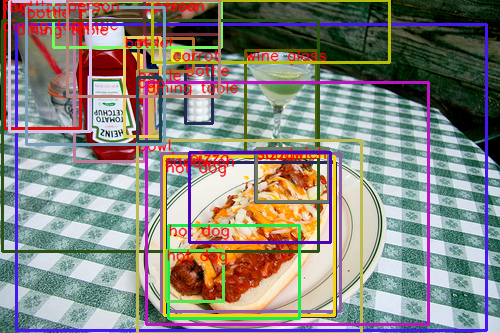

In [ ]:
main()
